![En tête general](img/En_tete_general.png)


*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*

<span style="color: #9317B4"> Pour exécuter une saisie Python, sélectionner la cellule et valider avec </span><span style="color: #B317B4"><strong>SHIFT+Entrée</strong></span>.


# <span style="color:#6C3483">Une Spirale infinie de longueur finie </span>
#### <span style="color:#6C3483">Étude d'une suite de nombres complexes</span>

<span style="color:#6C3483">__Note :__ Cette activité <u>ne</u> nécessite <u>pas</u> la connaissance de l'écriture exponentielle d'un nombre complexe. Elle est inspirée d'un exercice du Bac S 2014 Centres Étrangers.</span>

__On considère la suite de nombres complexes $(z_n)_{n \geq 0}$ définie par :__
<ul>
    <li>$z_0=16$ ;</li>
    <li>$\forall n \in \mathbb{N}$ ; $\displaystyle z_{n+1}=\frac{1+i}{2}z_n$.</li>
</ul>

__1. a. Déterminer les formes algébriques de $z_1$ ; $z_2$ et $z_3$.__<br>

<ul style="color:red">
    <li>$\displaystyle z_1=\frac{1+i}{2}z_0=\frac{1+i}{2}\times16=8+8i$</li>
    <li>$\displaystyle z_2=\frac{1+i}{2}z_1=\frac{1+i}{2}\times(8+8i)=4(1+i)²=8i$</li>
    <li>$\displaystyle z_3=\frac{1+i}{2}z_2=\frac{1+i}{2}\times8i=-4+4i$</li>
</ul>

$\;\;\;$__b. Le nombre complexe $i$ se code <mark>1j</mark> en Python. Exécuter les deux cellules suivantes, qui permettent de définir $z_0$ et de calculer $z_1$.__

In [1]:
z0 = 16
z0

16

In [2]:
z1 = z0 * (1+1j) /2
z1

(8+8j)

$\;\;\;$__c. Effectuer des saisies pour calculer $z_2$ et $z_3$, et vérifier la cohérence avec les résultats de la question 1.a.__

In [3]:
# Utiliser ces zones de saisie pour les calculs des termes
z2 = z1 * (1+1j) /2
z2

8j

In [4]:
z3 = z2 * (1+1j) /2
z3

(-4+4j)

__2. a. On souhaite maintenant automatiser le calcul des termes de la suite $(z_n)_{n \geq 0}$.__<br>
$\quad\;\;\;$__Définir une fonction Python <mark>z</mark> qui reçoit en argument <mark>n</mark> et renvoie le nombre complexe $z_n$.__

In [5]:
# Écrire ici la fonction Python z
def z(n):
    """
    Fonction qui calcule le terme de rang n de la suite (zn)
    """
    m = 16
    q = (1+1j)/2
    for k in range(n):
        m = m * q
    return m

$\quad\;\;\;$__b. Effectuer des appels à la fonction <mark>z</mark> pour retrouver les valeurs de $z_1$ ; $z_2$ et $z_3$.__

In [6]:
# Utiliser ces zones de saisie pour les calculs des termes
z(1)

(8+8j)

In [7]:
z(2)

8j

In [8]:
z(3)

(-4+4j)

__3. La fonction Python <mark>graphique</mark> donnée ci-dessous permet d'obtenir une représentation graphique du plan complexe où apparaissent :__
<ul>
    <li>les points $M_n(z_n)$ pour $0\leq n \leq N$ ;</li>
    <li>les segments $[M_nM_{n+1}]$ pour $0\leq n \leq N-1$.</li>
</ul>

__Exécuter les deux cellules pour obtenir cette représentation graphique pour $N=10$.__

In [9]:
from pylab import *

def graphique(z,N):
    """
    Fonction qui affiche les points d'affixes z(n) pour n de 0 jusqu'à N
    et des segments qui les joignent
    où z est une fonction Python correspondant à une suite de complexes
    """ 
    
    # création de la liste des abscisses et de la liste des ordonnées
    Lx = [z(n).real for n in range(N+1)]
    Ly = [z(n).imag for n in range(N+1)]
    
    # création des noms des points
    Lname = ['$M_{'+str(n)+'}$' for n in range(N+1) ]
      
    #paramétrage de la fenêtre d'affichage    
    xmin = int(min(Lx+[-1])) ; xmax = int(max(Lx+[1]))+1
    ymin = int(min(Ly+[-1])) ; ymax = int(max(Ly+[1]))+1
    
    # réglage du repère orthonormé avec graduations
    figure(num=0, figsize=(12,8), dpi=80) ;  
    axis([xmin-0.5,xmax+0.5,ymin-0.5,ymax+0.5])
    xticks( [ k for k in range(xmin-1,xmax+1) ] )
    yticks( [ k for k in range(ymin-1,ymax+1) ] )   
    ax = gca()
    ax.spines['right'].set_color('none') 
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom') ; ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left') ; ax.spines['left'].set_position(('data',0))
    ax.set_aspect('equal')    
    # représentation des points avec leurs noms et des segments qui les joignent
    plot(Lx,Ly,color='orchid')
    scatter(Lx,Ly,color='darkviolet')     
    for n in range(N+1):
        text(Lx[n]+0.3,Ly[n]+0.3,Lname[n],horizontalalignment='center',verticalalignment='center', fontsize=10, color='darkviolet')

    # affichage
    show()

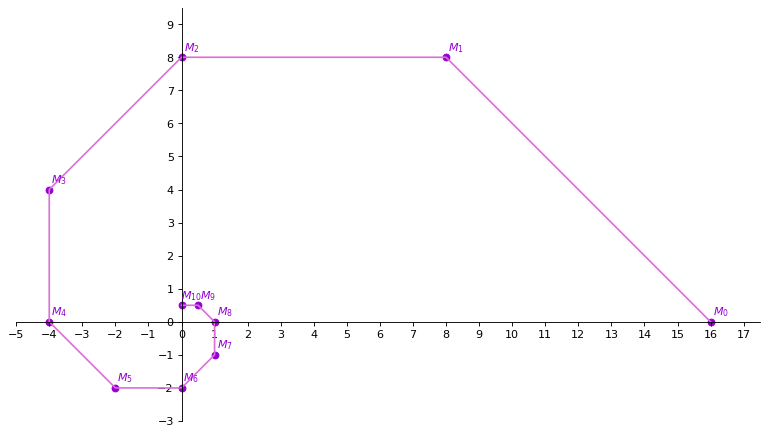

In [10]:
graphique(z,10)

<BLOCKQUOTE style='background-color:plum;'>
On souhaite maintenant étudier, pour $N \geq 1$ la longueur de la ligne polygonale $\color{darkviolet}{M_0M_1...M_N}$, notée $L_N$.<br>
Ainsi, on a :
$$L_N = \sum\limits_{n=0}^{N-1}{M_nM_{n+1}}=M_0M_1+M_1M_2+...+M_{N-1}M_N$$
</BLOCKQUOTE>    

__4. Étude algorithmique.__<br><br>
$\;\;\;$__a. La fonction Python <mark>abs</mark> permet de calculer le module d'un nombre complexe.__<br>
$\quad\;\;$__Exécuter les deux cellules suivantes. Que permettent-elles de calculer ?__
<br><br><span style="color:red">La première cellule permet de calculer l'affixe du vecteur $\overrightarrow{M_0M_1}$, et la deuxième cellule permet de calculer la longueur $M_0M_1$.</span>

In [11]:
a = z(1)-z(0)
a

(-8+8j)

In [12]:
abs(a)

11.313708498984761

$\;\;\;$__b. Définir une fonction Python <mark>L</mark> qui reçoit en argument <mark>N</mark> et renvoie la longueur $L_N$.__

In [13]:
# Écrire ici la fonction Python L
def L(N):
    """
    Fonction qui calcule la longueur de la ligne polygonale jusqu'au point de rang N
    """
    S = 0
    for n in range(N):
        S = S + abs(z(n+1)-z(n))
    return S
        

$\;\;\;$__c. À l'aide de la fonction Python <mark>L</mark>, effectuer des saisies pour calculer $L_{10}$, $L_{100}$ puis $L_{1000}$.__<br>
$\quad\;\;$__Que peut-on conjecturer concernant $L_N$ lorsque $N$ tend vers $+\infty$ ?__
<br><br><span style="color:red">Il semble que la suite $(L_N)$ admette une limite finie.</span>

In [14]:
# Utiliser ces zones de saisie pour les calculs des termes
L(10)

37.42031021678297

In [15]:
L(100)

38.62741699796949

In [16]:
L(1000)

38.62741699796952

__5. Étude mathématique.__<br><br>
$\;\;\;$__Pour tout $n \geq 0$, on pose $r_n = \lvert z_n \rvert$.__<br><br>
$\;\;\;$__a. Démontrer que pour tout $n \geq 0$ ; $\displaystyle r_{n+1}=\frac{\sqrt{2}}{2}r_n$. En déduire la nature de la suite $(r_n)_{n \geq 0}$.__<br><br>
$\;\;\;$__b. Démontrer que pour tout $n \geq 0$ ; $M_nM_{n+1}=r_{n+1}$.__<br><br>
$\;\;\;$__c. En déduire une expression de $L_N = \displaystyle\sum\limits_{n=0}^{N-1}{M_nM_{n+1}}$ en fonction de $N$.__<br><br>
$\;\;\;$__d. Déterminer $\lim\limits_{N \to +\infty}{L_N}$ pour retrouver le résultat conjecturé à la question 4.c.__<br><br>
$\quad\;\;$__À l'aide d'une saisie Python, obtenir une valeur approchée de cette limite.__<br>
$\quad\;\;$Aide : La fonction Python <mark>sqrt</mark> permet de calculer la racine carrée d'un nombre.<br>
$\quad\;\;$__Comparer avec la valeur de $L_{1000}$.__


<span style="color:red">   
a. $r_{n+1}=\lvert z_{n+1} \rvert = \displaystyle\left\lvert \frac{1+i}{2} z_n \right\rvert = \displaystyle\left\lvert \frac{1+i}{2} \right\rvert \times \lvert z_n \rvert = \frac{\lvert 1+i \rvert}{2} r_n = \frac{\sqrt{2}}{2} r_n$.<br> $\;\;\;(r_n)$ est donc la suite géométrique de premier terme $r_0=\lvert z_0 \rvert=16$ et de raison $\displaystyle\frac{\sqrt{2}}{2}$.         <br><br>
b. $M_nM_{n+1}=\lvert z_{n+1}-z_n \rvert = \displaystyle\left\lvert \frac{1+i}{2}z_n-z_n \right\rvert = \displaystyle\left\lvert \left( \frac{1+i}{2}-1 \right) z_n \right\rvert = \displaystyle\left\lvert \frac{-1+i}{2}  z_n \right\rvert = \displaystyle\left\lvert \frac{-1+i}{2} \right\rvert \times \lvert z_n \rvert = \frac{\sqrt{2}}{2}r_n = r_{n+1} $
<br><br>    
c. $L_N =\displaystyle \sum\limits_{n=0}^{N-1}{M_nM_{n+1}} = \sum\limits_{n=0}^{N-1}{r_{n+1}} = \sum\limits_{n=0}^{N-1}{r_0 \times \left( \frac{\sqrt{2}}{2} \right)^{n+1} } = r_0 \frac{\sqrt{2}}{2} \sum\limits_{n=0}^{N-1}{ \left( \frac{\sqrt{2}}{2} \right)^n } = 8 \sqrt{2} \times \frac{1-\left( \frac{\sqrt{2}}{2} \right) ^N}{1-\frac{\sqrt{2}}{2}} = \frac{16\sqrt{2}}{2-\sqrt{2}} \times \left( 1-\left( \frac{\sqrt{2}}{2} \right) ^N \right)$
<br><br>  
d. $\displaystyle\lim\limits_{N \to +\infty}{\left( \frac{\sqrt{2}}{2} \right) ^N}=0$<br>
$\;\;\;$donc  $\displaystyle\lim\limits_{N \to +\infty}{L_N} = \frac{16\sqrt{2}}{2-\sqrt{2}} = \frac{16\sqrt{2}\left(2+\sqrt{2}\right)}{\left(2-\sqrt{2}\right)\left(2+\sqrt{2}\right)} = \frac{16\left(2\sqrt{2}+2\right)}{2} = 16 \left(1+\sqrt{2}\right)$






</span>

In [17]:
# Effectuer ici une saisie pour une valeur approchée de la limite
16*(1+sqrt(2))

38.62741699796952

![Jean_Robert_Argand](img/Jean_Robert_Argand.jpg)

<center> <a href="https://fr.wikipedia.org/wiki/Jean-Robert_Argand">Jean Robert Argand</a> (1768-1822) a présenté en 1806 une méthode de représentation géométrique des nombres complexes dans le plan.</center>

*(C) Copyright Franck CHEVRIER 2019-2020 http://www.python-lycee.com/*
